# Filter Based Feature Selection

In [1]:
import pandas as pd
import numpy as np

In [2]:
# importing data
data = pd.read_csv("datasets/train.csv").drop(columns= "subject")
print(data.shape)
data.head()

(7352, 562)


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [3]:
# output variable = categorical
data.Activity.value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [4]:
# importing necessary library
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

x = data.drop("Activity", axis=1)
y = data["Activity"]

lcd = LabelEncoder()
y = lcd.fit_transform(y)

In [5]:
# splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=.2, random_state=42)

x_train.shape,x_test.shape

((5881, 561), (1471, 561))

##  Applying Logistics Regression

In [6]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train,y_train)

# predicting
y_predicted = log_reg.predict(x_test)
accuracy = accuracy_score(y_test,y_predicted)
print(f"Accuracy Score:= {accuracy}")

Accuracy Score:= 0.9809653297076818


C:\Users\rawat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Removing Duplicate Columns

In [7]:
def get_duplicate_columns(df):
    
    duplicate_col = {}
    seen_column = {}
    
    for column in df.columns:
        curr_col = df[column]
        
#         converting column data to bytes
        try:
            curr_col_hash = curr_col.values.tobytes()
        except AttributeError:
            curr_col_hash = curr_col.to_string().encode()
            
        if curr_col_hash in seen_column:
            if seen_column[curr_col_hash] in duplicate_col:
                duplicate_col[seen_column[curr_col_hash]].append(column)
            else:
                duplicate_col[seen_column[curr_col_hash]] = [column]
        else:
            seen_column[curr_col_hash] = column
    return duplicate_col

In [21]:
get_duplicate_columns(x_train)

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [14]:
x_train.columns[x_train.T.duplicated()]

Index(['tBodyAccMag-sma()', 'tGravityAccMag-mean()', 'tGravityAccMag-std()',
       'tGravityAccMag-mad()', 'tGravityAccMag-max()', 'tGravityAccMag-min()',
       'tGravityAccMag-sma()', 'tGravityAccMag-energy()',
       'tGravityAccMag-iqr()', 'tGravityAccMag-entropy()',
       'tGravityAccMag-arCoeff()1', 'tGravityAccMag-arCoeff()2',
       'tGravityAccMag-arCoeff()3', 'tGravityAccMag-arCoeff()4',
       'tBodyAccJerkMag-sma()', 'tBodyGyroMag-sma()', 'tBodyGyroJerkMag-sma()',
       'fBodyAccMag-sma()', 'fBodyBodyAccJerkMag-sma()',
       'fBodyBodyGyroMag-sma()', 'fBodyBodyGyroJerkMag-sma()'],
      dtype='object')

In [8]:
duplicate_columns = get_duplicate_columns(x_train)

In [9]:
x_train[["tBodyAccMag-mean()","tBodyAccMag-sma()",'tGravityAccMag-mean()','tGravityAccMag-sma()']]

,tBodyAccMag-mean(),tBodyAccMag-sma(),tGravityAccMag-mean(),tGravityAccMag-sma()
57,-0.997420,-0.997420,-0.997420,-0.997420
4154,-0.133797,-0.133797,-0.133797,-0.133797
6945,0.130528,0.130528,0.130528,0.130528
527,-0.955222,-0.955222,-0.955222,-0.955222
4196,-0.992499,-0.992499,-0.992499,-0.992499
...,...,...,...,...
5191,-0.372758,-0.372758,-0.372758,-0.372758
5226,-0.256033,-0.256033,-0.256033,-0.256033
5390,-0.434138,-0.434138,-0.434138,-0.434138
860,-0.983969,-0.983969,-0.983969,-0.983969


In [10]:
for one_list in duplicate_columns.values():
    x_train.drop(columns=one_list, inplace=True)
    x_test.drop(columns=one_list, inplace=True)

In [11]:
x_train.shape,x_test.shape
# 561 columns to 540 after removing duplicates

((5881, 540), (1471, 540))

##  Variance Threshold

In [12]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=.05)
sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [13]:
print(sum(sel.get_support()))

349


In [14]:
# filtering columns
columns = x_train.columns[sel.get_support()]
columns

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z',
       'tBodyAcc-min()-X',
       ...
       'fBodyBodyGyroJerkMag-meanFreq()', 'fBodyBodyGyroJerkMag-skewness()',
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)'],
      dtype='object', length=349)

In [15]:
# applying to train,test

x_train = sel.transform(x_train)
x_test = sel.transform(x_test)

x_train = pd.DataFrame(x_train,columns=columns)
x_test = pd.DataFrame(x_test,columns=columns)

In [16]:
x_train.shape,x_test.shape
# 540 columns to 349 after variance threshold apply

((5881, 349), (1471, 349))

## Correlation

In [17]:
corr_matrix = x_train.corr()

In [18]:
# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []

# Loop over the columns
for i in range(len(columns)):
    for j in range(i + 1, len(columns)):
        # Access the cell of the DataFrame
        if corr_matrix.loc[columns[i], columns[j]] > 0.95:
            columns_to_drop.append(columns[j])         

In [19]:
print(len(columns_to_drop))
print(len(set(columns_to_drop)))
x_train.shape

1508
197


(5881, 349)

In [20]:
x_train.drop(columns=columns_to_drop, axis=1, inplace=True)
x_test.drop(columns=columns_to_drop, axis=1, inplace=True)

x_train.shape,x_test.shape
# 349 columns to 352 after correlation apply

((5881, 152), (1471, 152))

## ANOVA

In [21]:
from sklearn.feature_selection import f_classif,SelectKBest

make = SelectKBest(f_classif, k=100)
make.fit(x_train,y_train)

SelectKBest(k=100)

In [22]:
columns = x_train.columns[make.get_support()]
x_train.columns[make.get_support()]

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3',
       'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Z,1',
       'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-Y,Z',
       'tGravityAcc-mean()-X', 'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z',
       'tGravityAcc-sma()', 'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff

In [23]:
x_train.columns[make.get_support()]

x_train = make.transform(x_train)
x_test = make.transform(x_test)


In [24]:

x_train = pd.DataFrame(x_train, columns=columns)
x_test = pd.DataFrame(x_test, columns=columns)

In [27]:
x_train.shape, x_test.shape

((5881, 100), (1471, 100))

### Evaluating The Model

In [28]:
log_regression = LogisticRegression(max_iter=1000)
log_regression.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [33]:
# Make predictions on the test set
y_pred = log_regression.predict(x_test)

# Calculate and print accuracy score
accuracy_scr = accuracy_score(y_test, y_pred)
print("Test accuracy with 561 columns:",accuracy)
print("Test accuracy with 100 columns:", accuracy_scr)

Test accuracy with 561 columns: 0.9700883752549286
Test accuracy with 100 columns: 0.9700883752549286


### Chi-Square Test

In [38]:
import seaborn as sns

titanic = sns.load_dataset("titanic")
titanic = titanic[['pclass','sex','sibsp','parch','embarked','survived']]

titanic.head()

,pclass,sex,sibsp,parch,embarked,survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [44]:
from scipy.stats import chi2_contingency
scores = []

for feature in titanic.columns[:-1]:
    
    cross_tab = pd.crosstab(titanic["survived"], titanic[feature])
    
    p_value = chi2_contingency(cross_tab)[1]
    scores.append(p_value)

<Axes: >

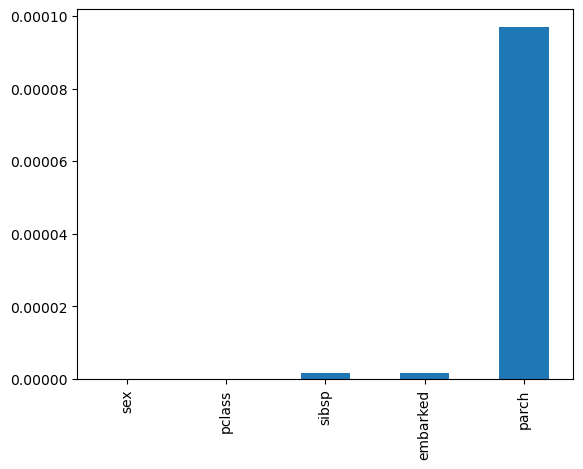

In [50]:
pd.Series(scores, index=titanic.columns[:-1]).sort_values(ascending = True).plot(kind="bar")

In [52]:
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# encode categorical variable
le = LabelEncoder()
titanic_encode = titanic.apply(le.fit_transform)

In [56]:
# seperate input and output variables
x = titanic_encode.drop("survived", axis=1)
y = titanic_encode["survived"]

# calculate chi_square
chi_sq = chi2(x,y)


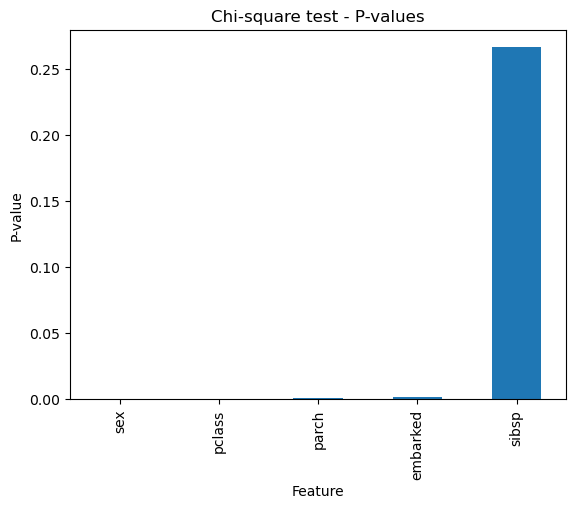

In [64]:
# chi_scores[1] are the p-values of each feature.
p_value = pd.Series(chi_sq[1], index=x.columns).sort_values(ascending=True)


# Plotting the p-values
p_value.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()